<a href="https://colab.research.google.com/github/sohenney/2025-1_CV/blob/main/HW_2_10_2021025030_%EC%9D%B4%EC%86%8C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

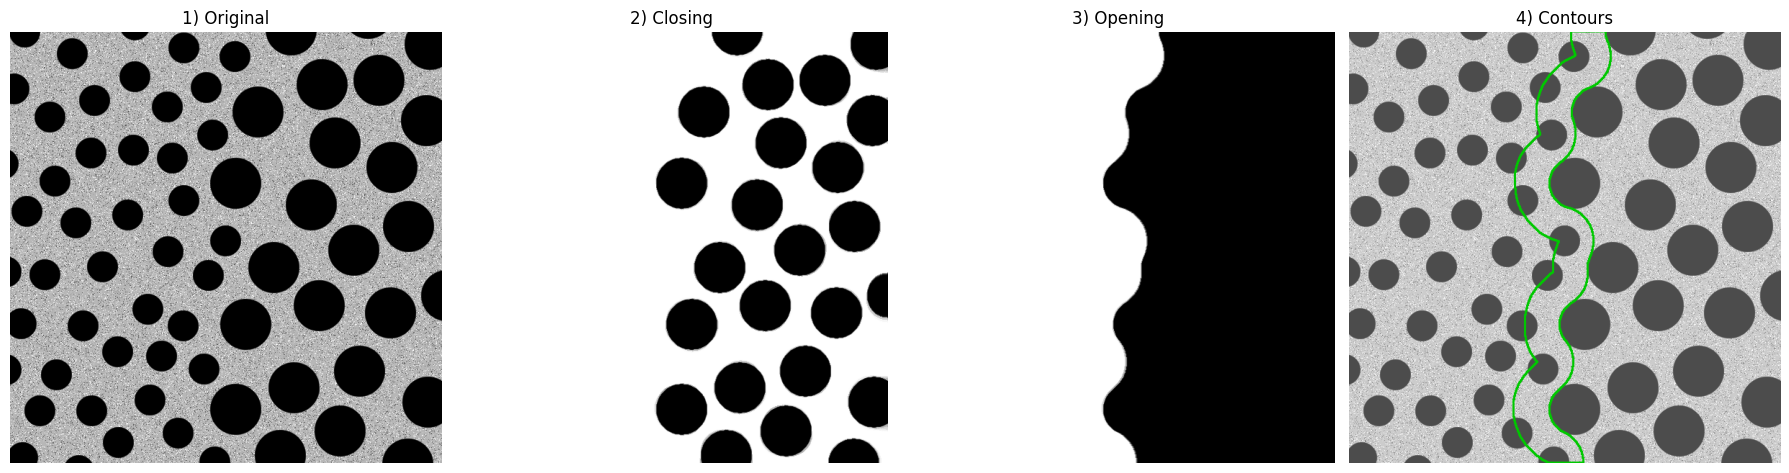

In [ ]:
import cv2  # 영상 처리에 사용되는 OpenCV 라이브러리
import numpy as np  # 수치 연산과 배열 조작을 위한 NumPy
import matplotlib.pyplot as plt  # 이미지 시각화를 위한 Matplotlib
import urllib.request  # 웹에서 이미지 데이터를 불러오기 위한 모듈

# 이미지 다운로드 및 로드
def read_img_from_web(img_link):
    stream = urllib.request.urlopen(img_link)
    byte_data = bytearray(stream.read())
    np_array = np.asarray(byte_data, dtype=np.uint8)
    return cv2.imdecode(np_array, cv2.IMREAD_GRAYSCALE)

# 이미지 URL
img_path = 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif'
img_gray = read_img_from_web(img_path)

# Closing 연산
shape1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (55, 55))
closed = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, shape1)

# Opening 연산
shape2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (95, 95))
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, shape2)

# Erosion 후 Subtract (외곽선 강조)
shrunk = cv2.erode(opened, shape2)
border = opened - shrunk
_, border_bin = cv2.threshold(border, 1, 255, cv2.THRESH_BINARY)

# 윤곽선 검출
contour_set, _ = cv2.findContours(border_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 다각형 근사화 생략하고 단순 컨투어만 그림
img_final = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
for item in contour_set:
    cv2.drawContours(img_final, [item], -1, (0, 200, 0), 2)

# 시각화 개별 구성
plt.figure(figsize=(18, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("1) Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(closed, cmap='gray')
plt.title("2) Closing")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(opened, cmap='gray')
plt.title("3) Opening")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_final)
plt.title("4) Contours")
plt.axis('off')

plt.tight_layout()
plt.show()


# ### 결과 분석 ###
#
# 영상의 배경과 객체 간 명암차가 크지만 단순한 이진화만으로는 원하는 큰 객체의 외곽선만을 분리하기 어려운 상황이었음.
# 이를 해결하고자 구조화 형태 연산을 활용하여 먼저 Closing을 적용, 내부의 빈 공간을 메운 뒤 Opening으로 잡음성 객체를 제거하였음.
# 이 과정 후 남은 형상에서 Erosion과 Subtraction을 조합하여 외곽선을 강화하는 효과를 얻을 수 있었음.
#
# 윤곽선 탐색 후 단순한 선형 근사 없이 컨투어만 시각화하였는데 예상보다 복잡한 형상들도 그대로 표현되는 한계가 있었음.
#
# 전체적으로 연산 순서를 구성하며 객체 수와 경계 검출 품질의 균형을 맞추는 과정에서 시행착오가 있었고 커널 사이즈나 처리 방식에 따라 결과가 크게 달라짐을 확인할 수 있었음.
#
# 다만 여전히 작은 블롭들이 일부 남아 불필요한 경계선을 형성하는 경우가 있었고 이에 대해 후속 필터링 방법이 필요할 수 있음.